# Analýza prázdných snímků
Z důvodu časté nedostupnosti kamer je třeba zanalyzovat jak často se to stává a kdy.

In [1]:
import os
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

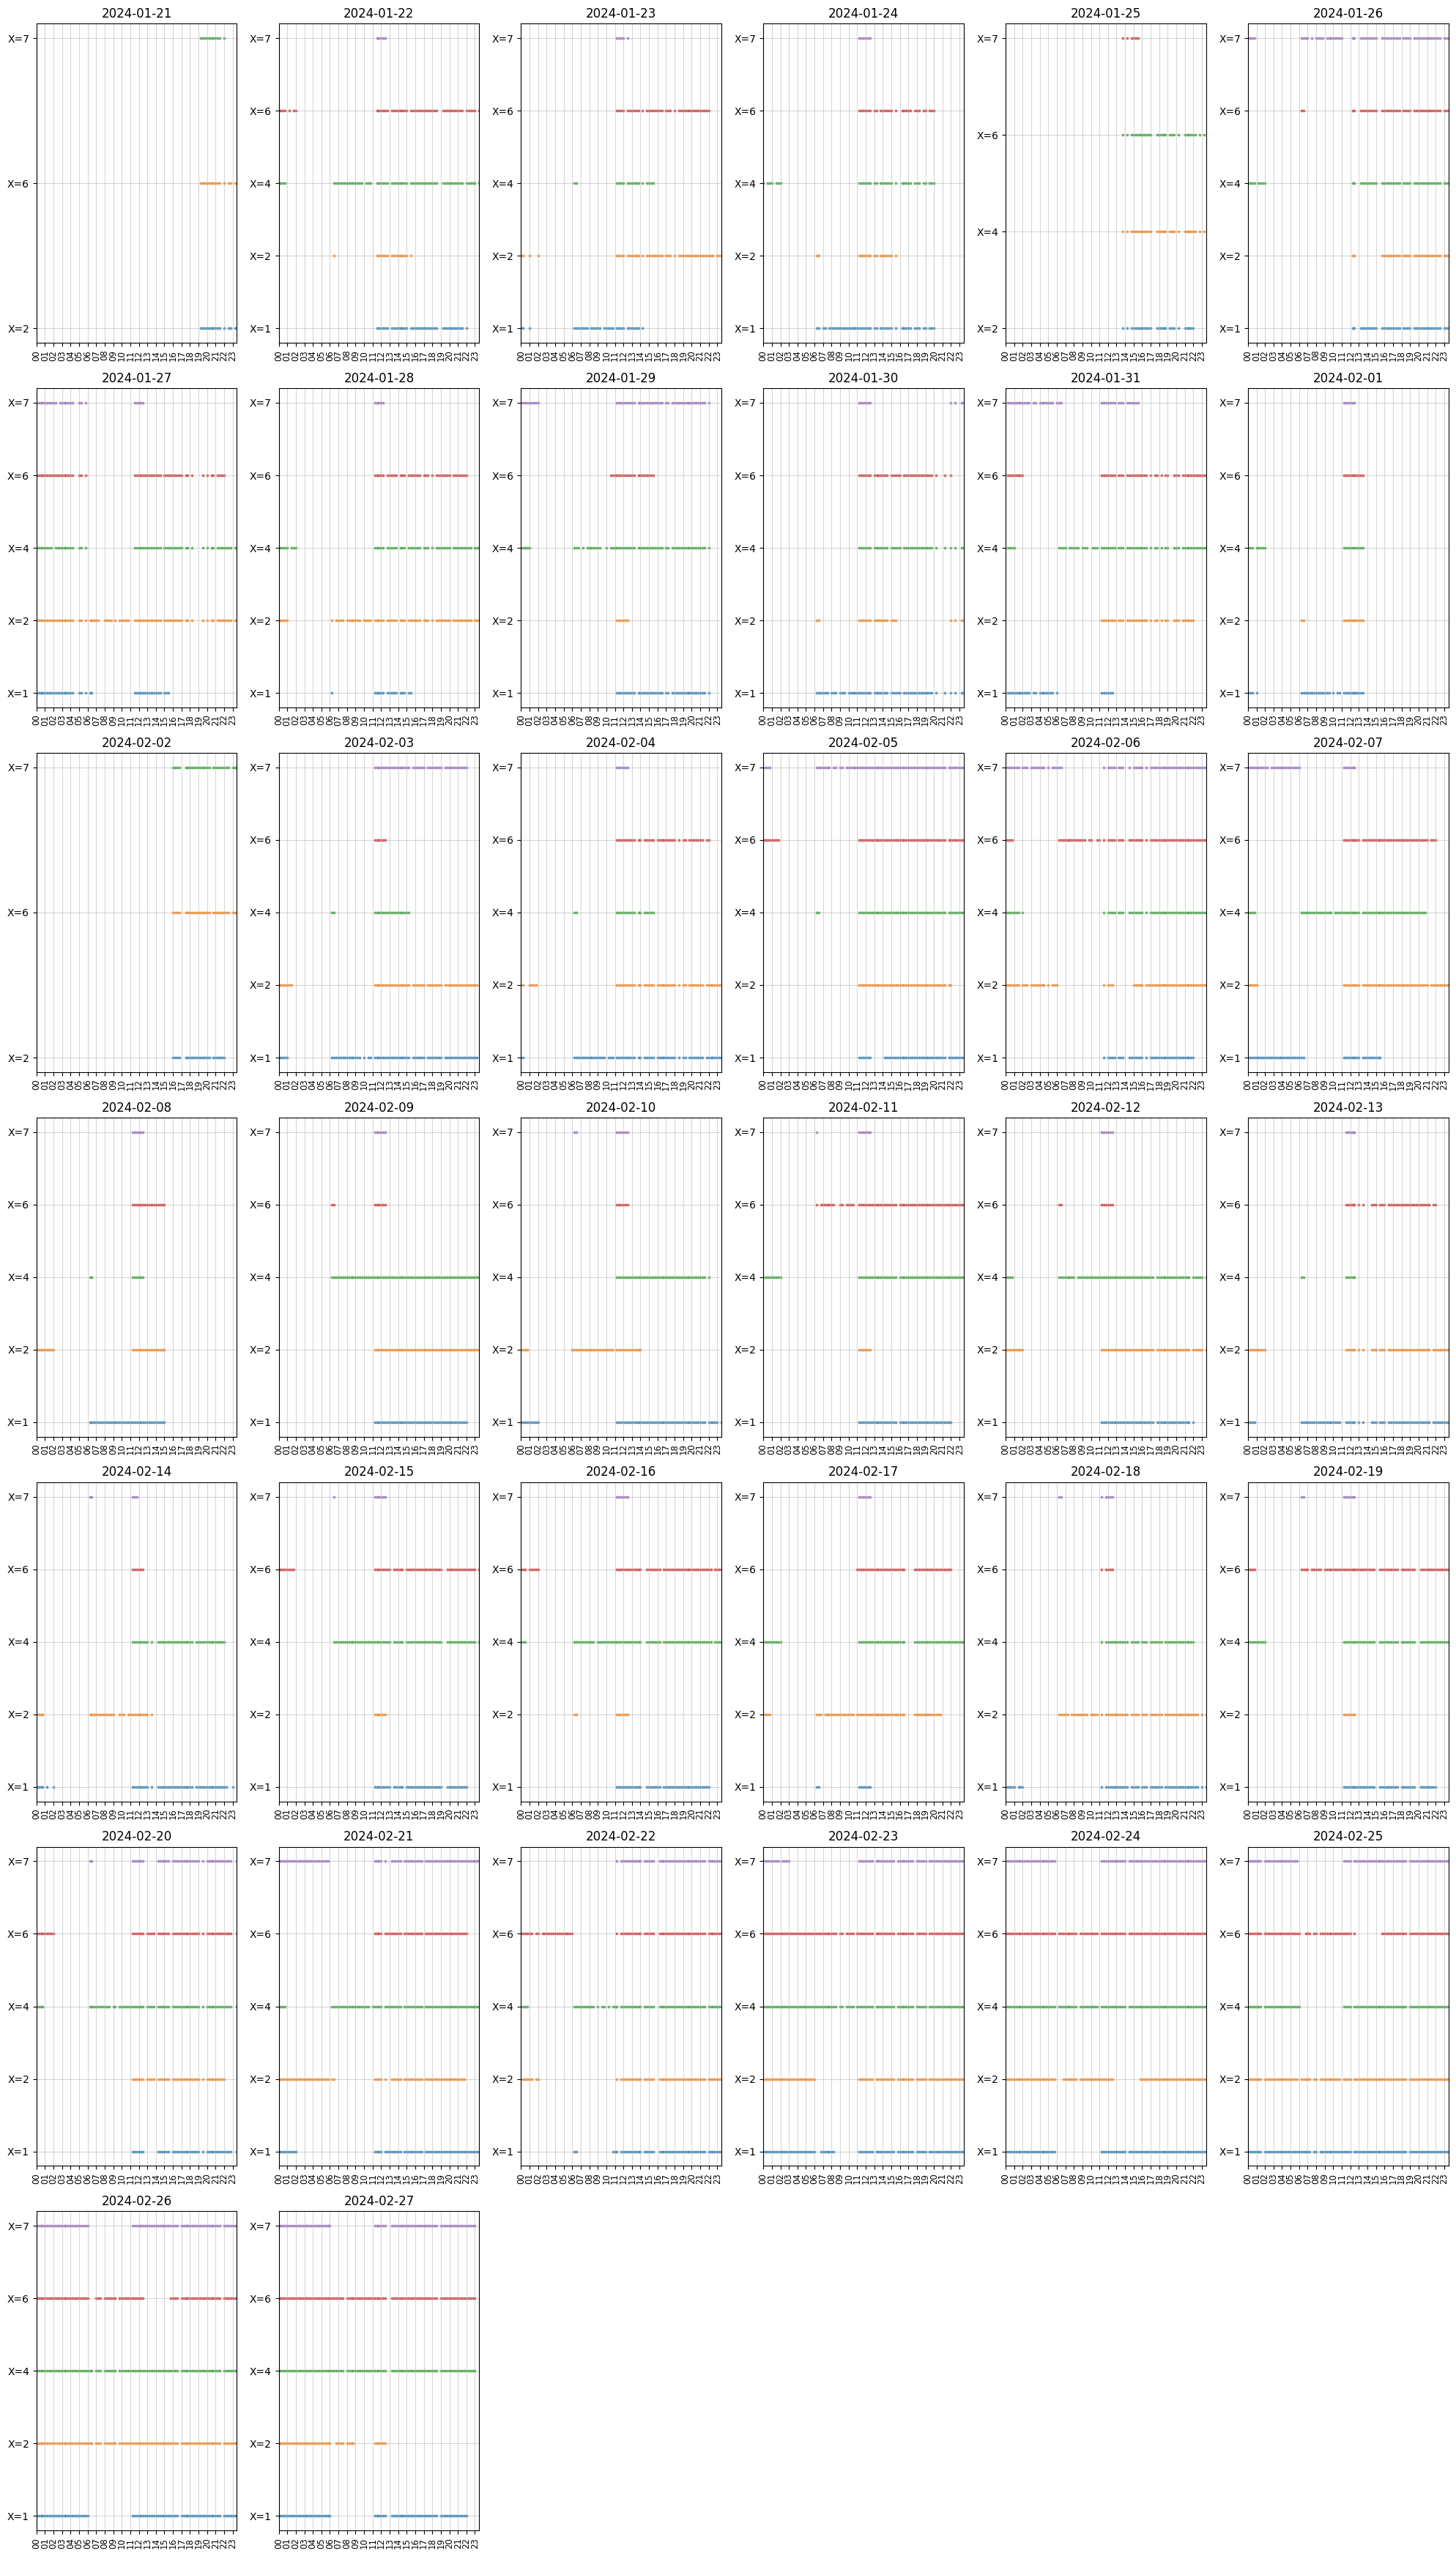

In [7]:
def plot_image_dates_and_times_by_day(directory):
    pattern = re.compile(r'screenshot(\d+)_(\d{2})_(\d{2})__(\d{2})_(\d{2})\.png')
    data = {}  

    for filename in os.listdir(directory):
        ending = os.path.splitext(filename)[0][-2:]
        if ending not in ['00', '15', '30', '45']:
            continue
        match = pattern.match(filename)
        if match:
            X, day, month, hour, minute = map(int, match.groups())
            timestamp = datetime(year=2024, month=month, day=day, hour=hour, minute=minute)
            date_key = timestamp.strftime('%Y-%m-%d')
            if date_key not in data:
                data[date_key] = {}
            if X not in data[date_key]:
                data[date_key][X] = []
            data[date_key][X].append(timestamp)
        else:
            print(f"Unmatched filename: {filename}")

    n_days = len(data)
    cols = 6
    rows = (n_days + cols - 1) // cols  

    fig, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  

    for i, (date_key, day_data) in enumerate(sorted(data.items())):
        ax = axs[i // cols, i % cols] if rows > 1 else axs[i % cols]
        for idx, (X, timestamps) in enumerate(day_data.items()):
            timestamps.sort()
            ax.scatter(timestamps, [idx+1] * len(timestamps), alpha=0.7, label=f'Camera={X}', s=3)
        ax.set_yticks(range(1, len(day_data) + 1))
        ax.set_yticklabels([f'X={X}' for X in sorted(day_data.keys())])
        ax.set_title(f'{date_key}')
        # Set x-axis limits and formatter
        date_obj = datetime.strptime(date_key, '%Y-%m-%d').date()
        start_time = datetime.strptime('00:00', '%H:%M').time()
        end_time = datetime.strptime('23:30', '%H:%M').time()
        ax.set_xlim([datetime.combine(date_obj, start_time), datetime.combine(date_obj, end_time)])
        ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0]))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        ax.xaxis.set_tick_params(rotation=90)
        ax.tick_params(axis='x', labelsize='small')
        
        ax.grid(which='major', alpha=0.5)

    if n_days % cols:
        for idx in range(n_days, rows * cols):
            axs.flat[idx].axis('off')

    plt.tight_layout()
    plt.show()

plot_image_dates_and_times_by_day("../../data_all/images/")
